In [9]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 80% !important; }</style>"))
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
seed = 42
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import numpy as np
np.random.seed(seed)
import logging
import random
random.seed(seed)
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)
#from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import cv2
from statsmodels.tsa.stattools import acf

2.14.0


In [2]:
%matplotlib widget

# Read and inspect Data

In [3]:
datas = np.load('training_dataset/training_data.npy', allow_pickle=True)
indexes = np.load('training_dataset/valid_periods.npy', allow_pickle=True)
labels = np.load('training_dataset/categories.npy', allow_pickle=True)

In [4]:
pd.Series(labels).value_counts()

B    10987
E    10975
C    10017
D    10016
A     5728
F      277
Name: count, dtype: int64

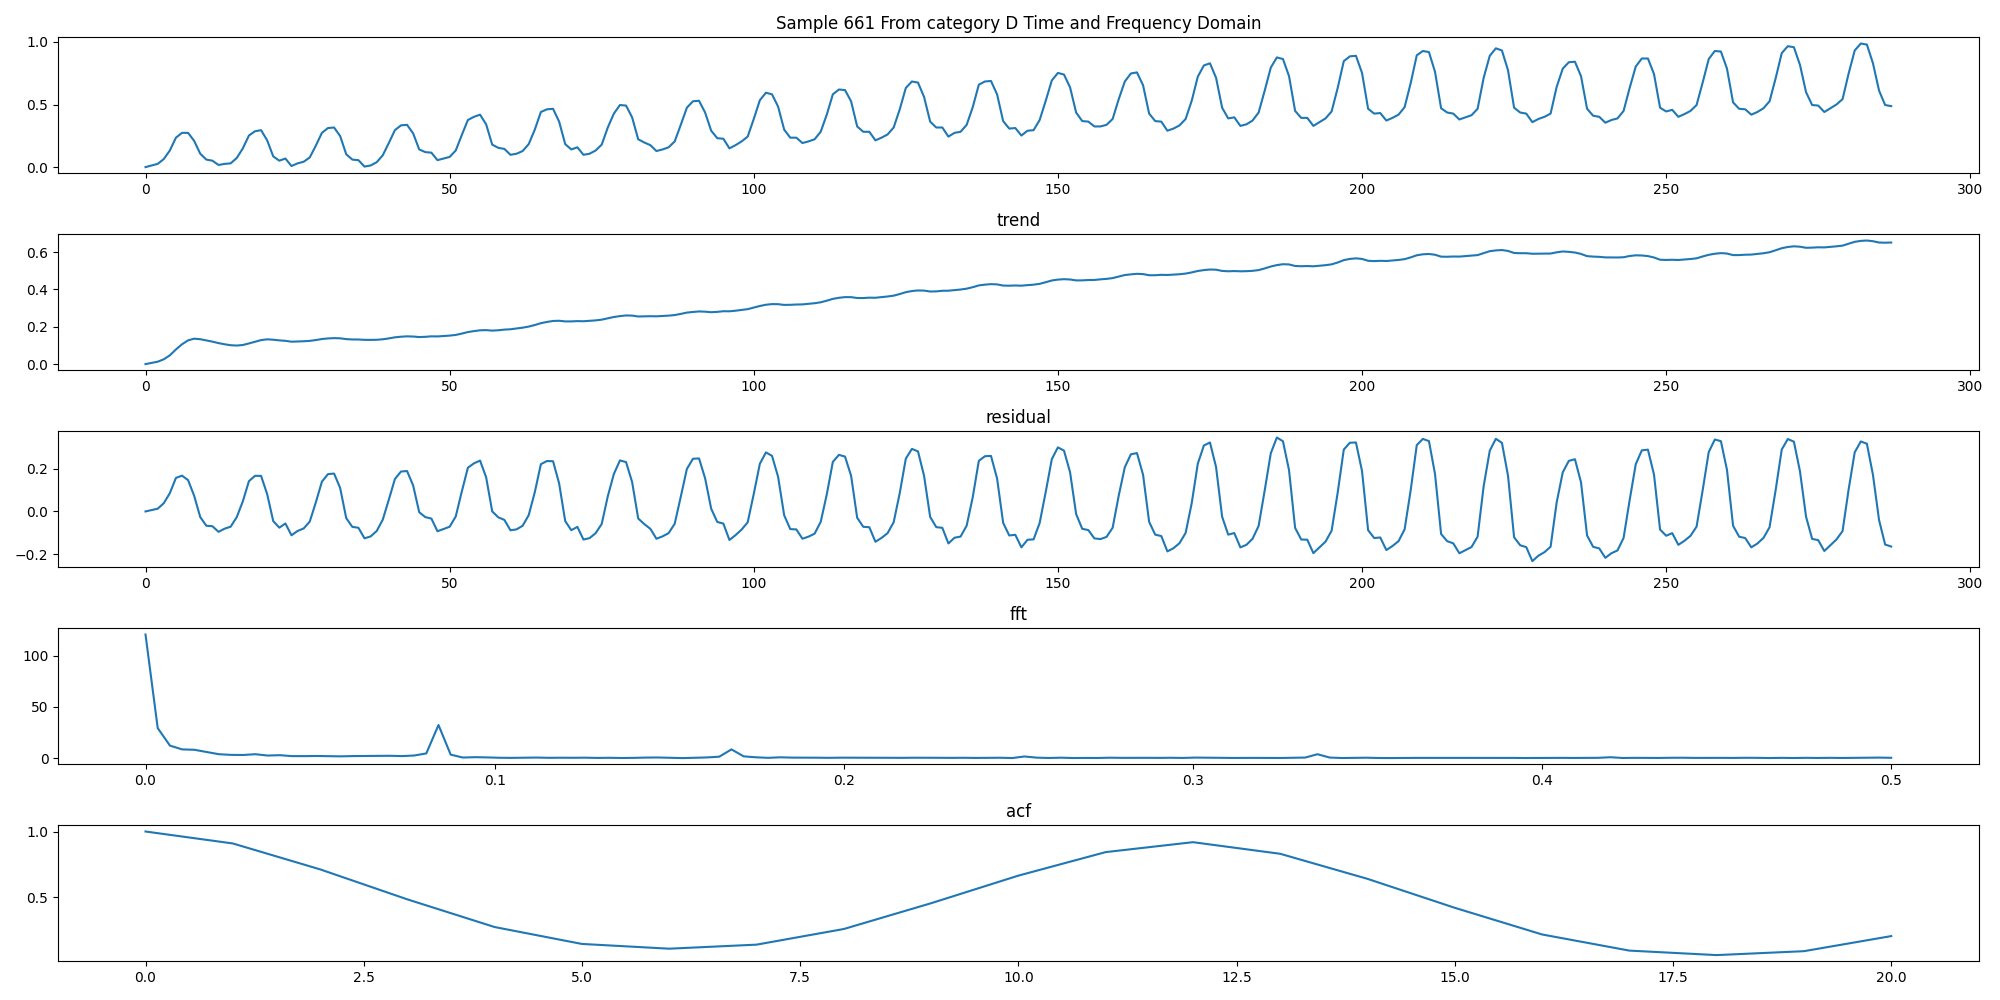

In [130]:
# 'A', 'B', 'C', 'D', 'E', 'F'
category = 'D'
sample = np.random.randint(1000)
window = 25

label = labels == category

data = datas[label][sample]
index = indexes[label][sample]
start = index[0]
end = index[1]
data = data[start:end]

data_acf = acf(data,nlags=20)
data_fft = np.abs(np.fft.fft(data))
N = data.shape[0]


fig,axs = plt.subplots(5,1,figsize = [20,10])
axs[0].plot(data)
axs[0].set_title('Sample {} From category {} Time and Frequency Domain'.format(sample,category))
axs[1].plot(pd.Series(data).rolling(window,min_periods = 1).mean())
axs[1].set_title('trend')
axs[2].plot(data - pd.Series(data).rolling(window,min_periods = 1).mean())
axs[2].set_title('residual')
axs[3].plot(np.linspace(0,0.5,N//2),data_fft[:N//2])
axs[3].set_title('fft')
axs[4].plot(data_acf)
axs[4].set_title('acf')
plt.tight_layout()